In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# load the DataFrame form returns.ipynb
column_names = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = pd.read_csv("aapl_data.csv", skiprows=3, names=column_names, index_col="Date", parse_dates=True)
df.head()




,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538498,72.598876,71.292289,71.545875,135480400
2020-01-03,71.833267,72.594032,71.608662,71.765644,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224426,73.526318,71.768101,71.768101,132079200


In [23]:
# calculate moving averages
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

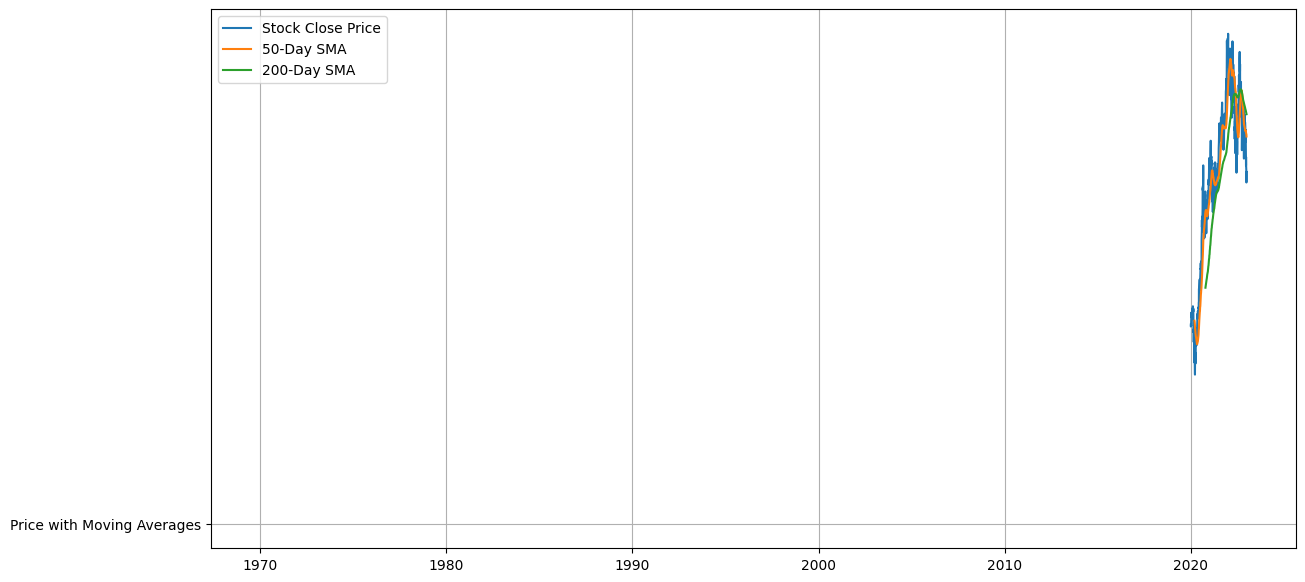

In [ ]:
# Plot the values
# plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Stock Close Price')
plt.plot(df['SMA50'], label='50-Day SMA')
plt.plot(df['SMA200'], label='200-Day SMA')
plt.plot("Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()